#### Student name : PONNU PETER
#### Studet ID   : 9058740

## 1._Framing the Problem_ 

This report aims to create and examine univariate linear regression models to forecast the median house value in California using three independent variables: median income, population, and the number of households. By investigating the connections between each independent variable and the dependent variable (median house value), we seek to determine which factor most significantly influences housing prices. This analysis will provide a basic understanding of how linear regression models operate in predicting continuous outcomes based on individual features.

- _Importing the necessary libraries_

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. _Getting the Data_ 

Dataset Source: [California Housing Prices on Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)


- _Import the csv file path from kaggle_

In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ponnu\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1


- _Load the dataset_

In [55]:
df = pd.read_csv(r"C:\Users\ponnu\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- _Printing the entire columns_

In [56]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## 3. _Exploratory Data Analysis (EDA)_

The goal of Exploratory Data Analysis (EDA) is to uncover insights from the dataset, recognize patterns, and the relationships among variables. In this analysis, we concentrate on the dependent variable, median house value, and how it relates to the independent variables: median income, population, and number of households.

In [57]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We create scatter plots to visualize how the median house value (the dependent variable) relates to each of the independent variables.

- _Median House value vs Median Income_

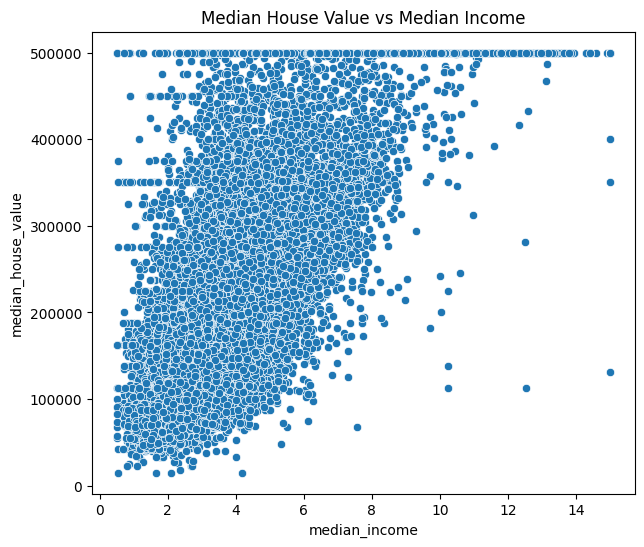

In [58]:
plt.figure(figsize=(7,6))
plt.title('Median House Value vs Median Income')
sns.scatterplot(x=df['median_income'],y=df['median_house_value'])
plt.show()

In the above graph,there is a positive linear correlation between median income and median house value. As income increases, house values tend to rise significantly.

- _Median House value vs population_

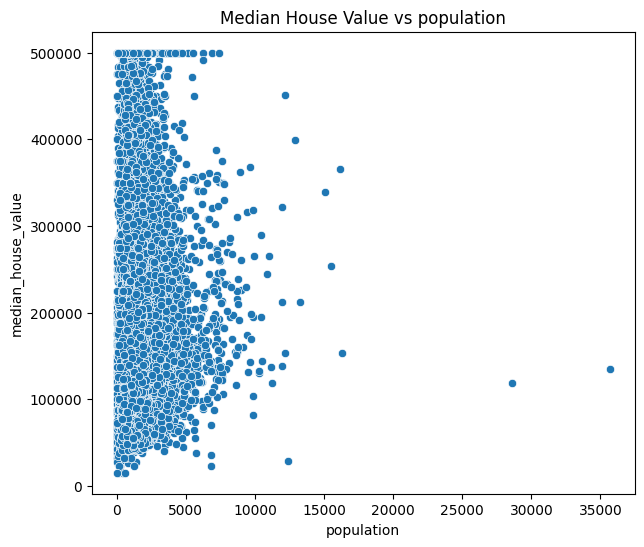

In [59]:
plt.figure(figsize=(7,6))
plt.title('Median House Value vs population')
sns.scatterplot(x=df['population'],y=df['median_house_value'])
plt.show()

In the above graph,the data points are scattered with no clear linear trend. Areas with both high and low populations show a broad range of house values, indicating a weak or no correlation.

- _Median House value vs Number of households_

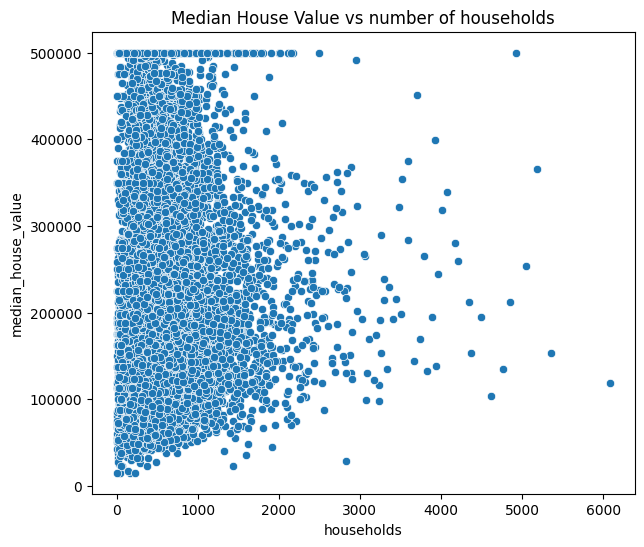

In [60]:
plt.figure(figsize=(7,6))
plt.title('Median House Value vs number of households')
sns.scatterplot(x=df['households'],y=df['median_house_value'])
plt.show()

In the above graph, there is a slight positive trend, where districts with more households tend to have somewhat higher house values. However, the data is more dispersed compared to median income, indicating a moderate correlation.

##### _Description of 4 variables_

1. Median House value(dependent variable)


- This represents the median house value of houses in various districts of california
- Range - Approximately between 15000 to 500001
- It is positively skewed, with a concentration of values closer to the higher end.

2. Median Income(independent variable)

- This indicates that the median household income in that district
- Range -varies from 0 to 15
- There is a positive linear correlation between median income and median house value

3. Population(independent variable)

- The total number of people living in each district
- Ranges from 3 to 35000
- There is no clear linear relationship with house values, as the data points are widely scattered.

4. Number of households(independent variable)

- Total  umber of household in each district
- Ranges from 1 to 6000
- There is a slight positive trend in median house values, suggesting a moderate correlation.



#### - _Data Preprocessing_

In [61]:
df_preprocessed = df[df.median_house_value != 500001] # clean the outliers that cause skewness by dropping those records
df_preprocessed.dropna(inplace=True)


Xincome = df_preprocessed[['median_income']]  # Independent variable(s)
Xpopulation = df_preprocessed[['population']]  # Independent variable(s)
Xhousehold = df_preprocessed[['households']]  # Independent variable(s)
y = df_preprocessed['median_house_value']  # Dependent variable

# Split the data into training and testing sets (80-20 split)
X_income_train, X_income_test, y_train, y_test = train_test_split(Xincome, y, test_size=0.2, random_state=42)
X_popu_train, X_popu_test, y_train, y_test = train_test_split(Xpopulation, y, test_size=0.2, random_state=42)
X_house_train, X_house_test, y_train, y_test = train_test_split(Xhousehold, y, test_size=0.2, random_state=42)


C:\Users\ponnu\AppData\Local\Temp\ipykernel_26008\3360241953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed.dropna(inplace=True)


## 4. _Linear regression_

- Define and fit Model1

In [62]:
model1 = LinearRegression()
model1.fit(X_income_train[["median_income"]], y_train)

LinearRegression()

- Define and fit Model2

In [63]:
model2 = LinearRegression()
model2.fit(X_popu_train[["population"]], y_train)

LinearRegression()

- Define and fit Model3

In [64]:
model3 = LinearRegression()
model3.fit(X_house_train[["households"]], y_train)

LinearRegression()

## 5. _Evaluate the model_

Finding slope,intercept,Mean squared error,Mean absolute error of three models

In [65]:
# slope and intercept of model1
slope1 = model1.coef_
intercept1 = model1.intercept_
y_pred_income = model1.predict(X_income_test)

# slope and intercept of model2

slope2 = model2.coef_
intercept2 = model2.intercept_
y_pred_popu = model2.predict(X_popu_test)

# slope and intercept of model3
slope3 = model3.coef_
intercept3 = model3.intercept_
y_pred_house = model3.predict(X_house_test)

# MSE and MAE of model 1 i.e.,median income

mse_income = metrics.mean_squared_error(y_test, y_pred_income)
mae_income = metrics.mean_absolute_error(y_test, y_pred_income)

#MSE and MAE of model2 i.e., population

mse_population = metrics.mean_squared_error(y_test, y_pred_popu)
mae_population = metrics.mean_absolute_error(y_test, y_pred_popu)

#MSE and MAE of model3 i.e.,Households

mse_households = metrics.mean_squared_error(y_test, y_pred_house)
mae_households = metrics.mean_absolute_error(y_test, y_pred_house)

#Summary of data 

summary_data = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Intercept': [intercept1, intercept2, intercept3],
    'Slope': [slope1[0], slope2[0], slope3[0]],
    'MSE': [mse_income, mse_population, mse_households],
    'MAE': [mae_income, mae_population, mae_households]
}

summary_df = pd.DataFrame(summary_data)

# Display the summary table
print(summary_df.to_string(index=False))


  Model     Intercept        Slope          MSE          MAE
Model 1  46023.581413 39774.629316 5.517550e+09 56826.289314
Model 2 190590.933630     1.079217 9.687749e+09 79596.251024
Model 3 180004.837832    24.183385 9.617540e+09 79111.355360


## 6. _Visualizations_

Plotting the regression line on top of the scatter plot for the data.

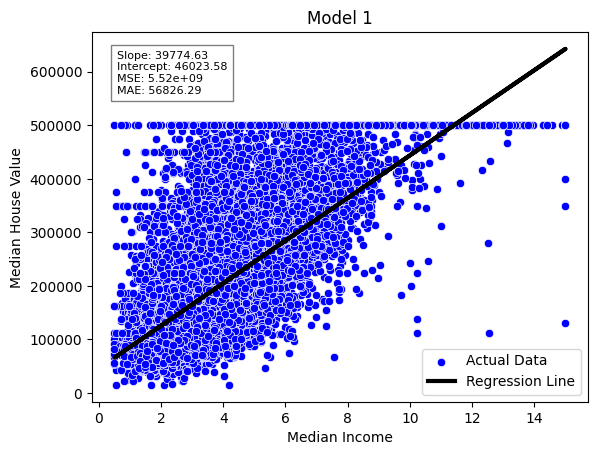

In [67]:
sns.scatterplot(x="median_income", y="median_house_value", data=df, color="blue", label="Actual Data")

# Plot the regression line using the model's prediction
plt.plot(X_income_train["median_income"], model1.predict(X_income_train[["median_income"]]), color="black", linewidth=3, label="Regression Line")

plt.annotate(
    f'Slope: {slope1[0]:.2f}\nIntercept: {intercept1:.2f}\nMSE: {mse_income:.2e}\nMAE: {mae_income:.2f}', 
    xy=(0.05, 0.95),  # Position (relative to the axes)
    xycoords='axes fraction',  # Coordinates are relative to the axes
    fontsize=8, 
    verticalalignment='top', 
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.5)
)
# Display the plot with labels and legend
plt.title("Model 1")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

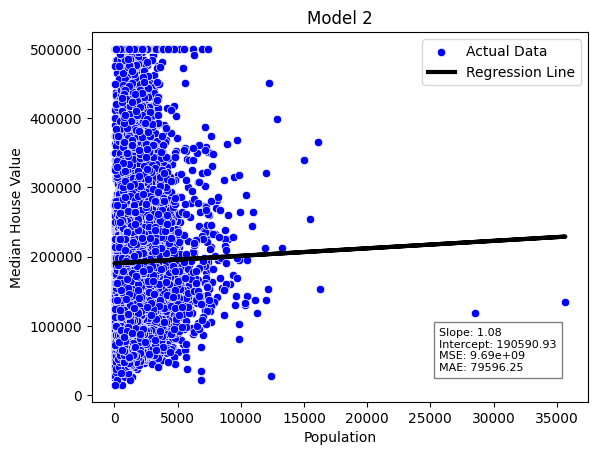

In [68]:
sns.scatterplot(x="population", y="median_house_value", data=df, color="blue", label="Actual Data")

# Plot the regression line using the model's prediction
plt.plot(X_popu_train["population"], model2.predict(X_popu_train[["population"]]), color="black", linewidth=3, label="Regression Line")

plt.annotate(
    f'Slope: {slope2[0]:.2f}\nIntercept: {intercept2:.2f}\nMSE: {mse_population:.2e}\nMAE: {mae_population:.2f}', 
    xy=(0.70, 0.20),  # Position (relative to the axes)
    xycoords='axes fraction',  # Coordinates are relative to the axes
    fontsize=8, 
    verticalalignment='top', 
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.5)
)
# Display the plot with labels and legend
plt.title("Model 2")
plt.xlabel("Population")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

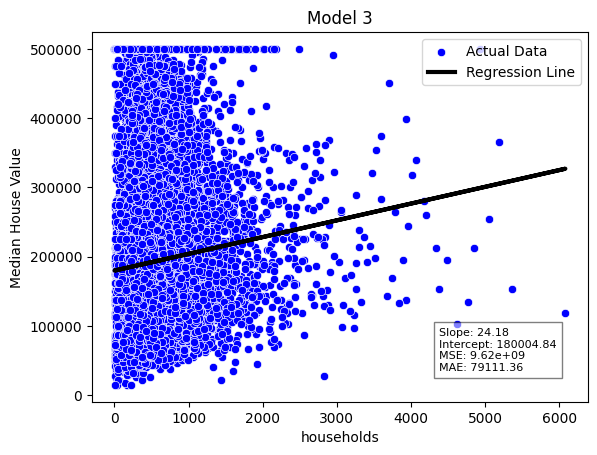

In [69]:
sns.scatterplot(x="households", y="median_house_value", data=df, color="blue", label="Actual Data")

# Plot the regression line using the model's prediction
plt.plot(X_house_train["households"], model3.predict(X_house_train[["households"]]), color="black", linewidth=3, label="Regression Line")

plt.annotate(
    f'Slope: {slope3[0]:.2f}\nIntercept: {intercept3:.2f}\nMSE: {mse_households:.2e}\nMAE: {mae_households:.2f}', 
    xy=(0.70, 0.20),  # Position (relative to the axes)
    xycoords='axes fraction',  # Coordinates are relative to the axes
    fontsize=8, 
    verticalalignment='top', 
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.5)
)
# Display the plot with labels and legend
plt.title("Model 3")
plt.xlabel("households")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

## 7. _Conclusion_

 After assessing the three linear regression models, we can evaluate them using goodness-of-fit metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE). These metrics help us understand how well the models align with the data, where lower values indicate superior performance.

 -  Model 1 - This model showed strong performance, featuring a lower MSE and MAE than the others. The regression line aligned well with  the data, indicating a robust predictive relationship between median income and household value.

 - Model 2 - This model showed slightly poorer performance compared to Model 1, as evidenced by a higher MSE and MAE. This suggests that population is not as strong a predictor of median house value as median income, likely because the relationship between population and housing prices is less direct.

 - Model 3 - Like Model 2, the MSE and MAE were higher, indicating that the number of households by itself does not establish a strong predictive link to median house value.


 #### _Summary_

 Among the three models, median income emerged as the most significant factor in predicting the median house value in California. In contrast, population and the number of households do not independently reflect the dynamics influencing housing prices as effectively as income does.